C:\Users\domanski\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


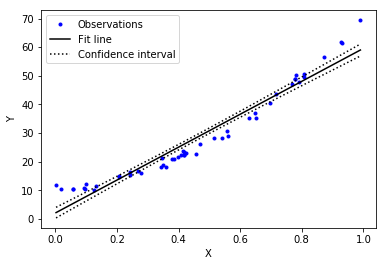

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from linearmodel.datamanager import DataManager
from linearmodel.model import ComplexOLSModel

X_dm = DataManager.read_tab_delimited_data(r'example data\Complex Linear\X.txt')
Y_dm = DataManager.read_tab_delimited_data(r'example data\Complex Linear\Y.txt')

dm = Y_dm.match_data(X_dm, time_window_width=15, match_method='nearest')

com_model = ComplexOLSModel(dm, response_variable='Y', explanatory_variable='X')
com_model.plot()

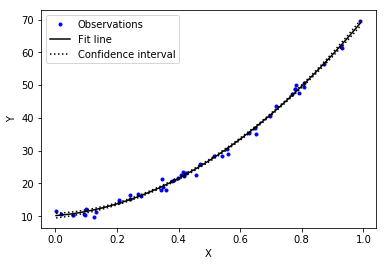

In [2]:
com_model.add_explanatory_var_transform('pow2')
com_model.plot()

In [3]:
com_model.get_model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
========================================
        Linear regression model:        
----------------------------------------
Y = 10.204 + 7.5057X + 52.283power(X, 2)
======================================================================================
                  coef    std err          t      P>|t|  [90.0% Conf. Int.]        VIF
--------------------------------------------------------------------------------------
Intercept      10.2038      0.431     23.657   9.46e-28     9.480    10.928           
X               7.5057      2.031      3.696   0.000571     4.098    10.913     13.765
power(X, 2)    52.2835      2.045     25.572   3.16e-29    48.853    55.714     13.765
                                     OLSRegression Results                                     
===============================================================================================
Number of observations                   50   R-squared                                   0.996
Error degrees of freedom                 47   Adjusted R-squared                        0.99583
Root mean squared error              1.0395   F-statistic vs. constant model             5847.7
Residual PPCC                       0.99239   p-value                                4.5186e-57
===============================================
             High leverage:               0.18 
Extreme outlier (Standardized residual):   3   
       High influence (Cook's D)         2.0541
        High influence (DFFITS)          0.4899
-----------------------------------------------
"""

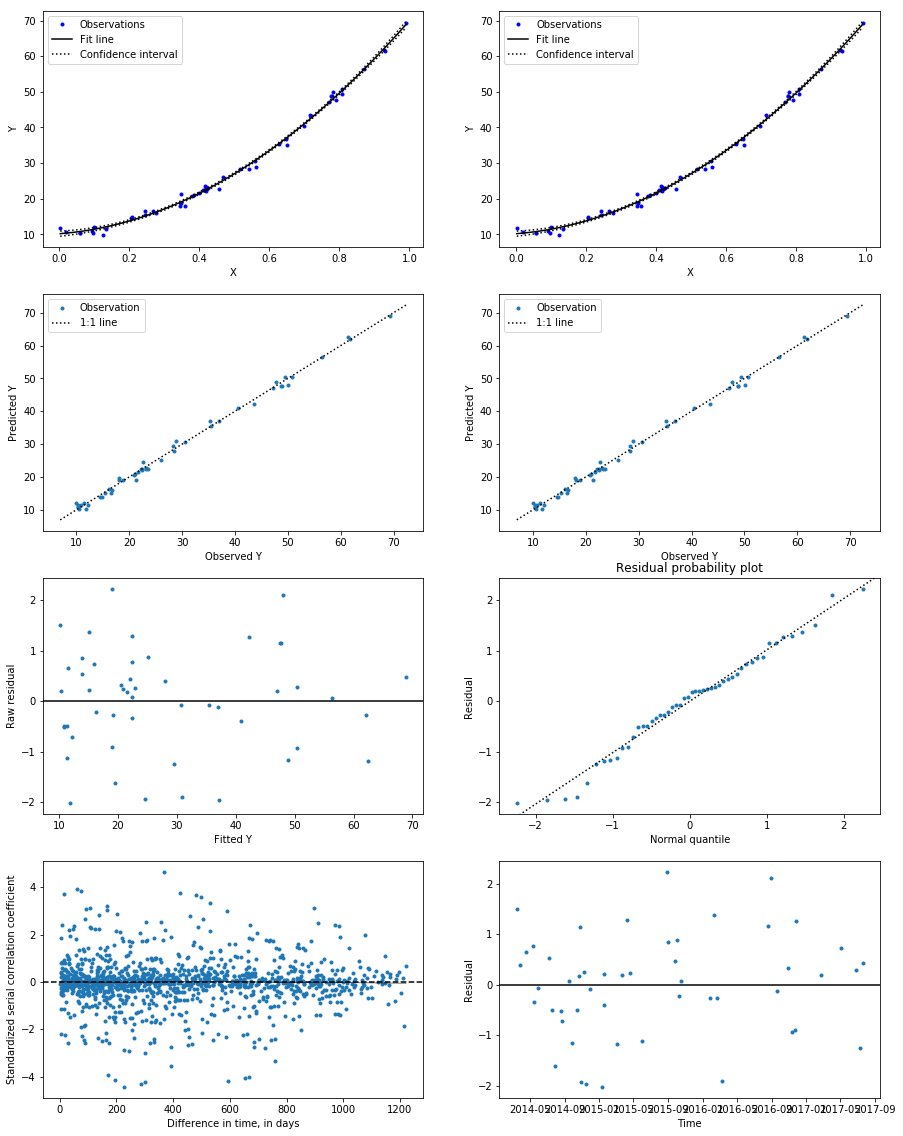

In [4]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
com_model.plot(ax=ax1)
com_model.plot('variable_scatter', ax=ax2)
com_model.plot('model_pred_vs_obs', ax=ax3)
com_model.plot('pred_vs_obs', ax=ax4)
com_model.plot('resid_vs_fitted', ax=ax5)
com_model.plot('resid_probability', ax=ax6)
com_model.plot('serial_correlation', ax=ax7)
com_model.plot('resid_vs_time', ax=ax8)
fig.set_size_inches(15, 20)